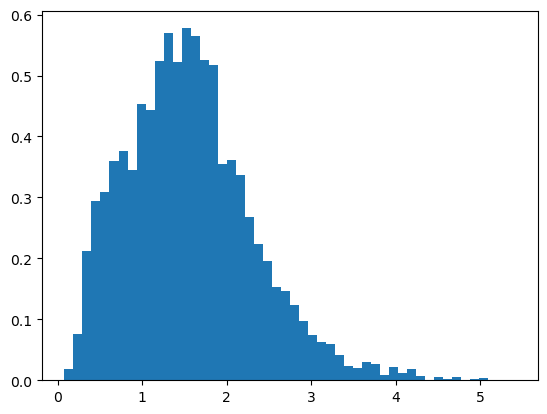

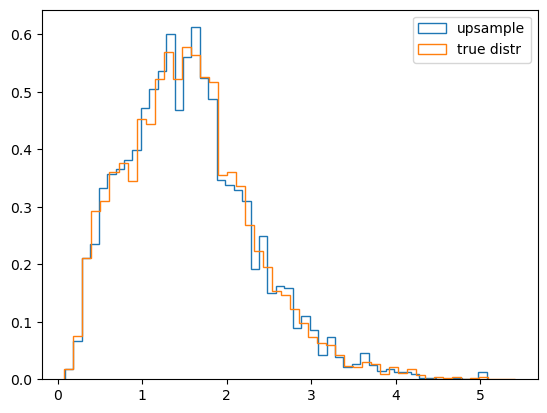

In [6]:
#UPSAMPLING WITH REJECTION SAMPLING

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from astroML.datasets import fetch_dr7_quasar

data = fetch_dr7_quasar()

data = data[:10000]

z = data['redshift']  
isto=plt.hist(z, bins=50, density=True)
plt.show()

#array con i valori dell'altezza di ciascun bin
high=[]
high=isto[0] 
hmax=max(high)

#array con gli estremi sn dei bin
values=[]
values=isto[1] 

x=np.random.uniform(values[0], values[50], 10000) 
y=np.random.uniform(0, hmax, 10000)  

disth = scipy.stats.rv_histogram((high,values)) 

xgoods=x[y<=disth.pdf(x)] 

#y<=disth.pdf(x): sono le y che stanno sotto l'istogramma

plt.hist(xgoods, bins=50, histtype="step", density=True, label="upsample")
plt.hist(z, bins=50, histtype="step", density=True, label="true distr")
plt.legend()
plt.show()

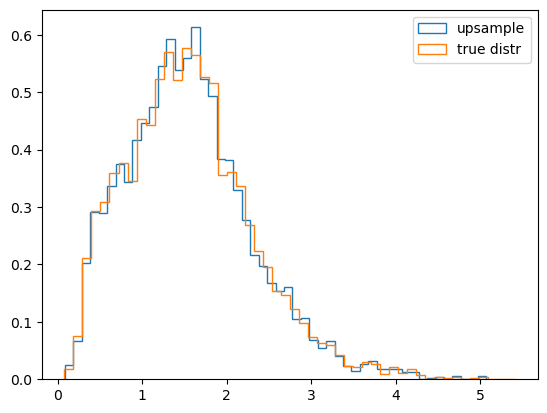

In [7]:
#INVERSE SAMPLING

P=np.random.uniform(0,1, 10000)
#restituisce il quantile della distr
xinv=disth.isf(P) 
plt.hist(xinv, bins=50, histtype="step", density=True, label="upsample")
plt.hist(z, bins=50, histtype="step", density=True, label="true distr")
plt.legend()
plt.show()

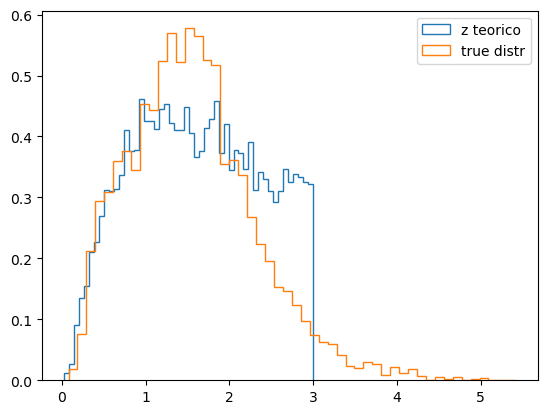

In [29]:
#distribuzione teorica dei quasar: uniformi nel comoving volume

from astropy.cosmology import Planck18 as cosmo
from astropy import units as u

#n è il numero di punti da generare
#z_max è il redshift massimo a cui generarli
def uniform_comoving_volume(n, z_max):
    
    #restituisce la distanza corrispondente a un redshift
    d_max = cosmo.comoving_distance(z_max).value
    
    comoving_vol = np.random.uniform(0, d_max**3, n)
    
    comoving_dist = comoving_vol**(1/3)
    
    zgrid=np.linspace(0, z_max, 10000)
    dgrid = cosmo.comoving_distance(zgrid).value

    redshift = np.interp(comoving_dist, dgrid, zgrid)
    
    return redshift


n = 10000
zmax = 6.0

redshifts = uniform_comoving_volume(n, zmax)

plt.hist(0.5*redshifts,bins=50, histtype='step', label="z teorico", density=True)
plt.hist(z, bins=50, histtype="step", density=True, label="true distr")
plt.legend()
plt.show()